Kaggle data link - https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction

Kaggle notebook linkc - https://www.kaggle.com/code/lokeshanjaneya/profile-prediction-lr-dt-ensembles-nn

About Dataset and challenge
Context
This data is from IBM Maratona, distributed using Apache License 2.0.
Tortuga Code is an online educational platform, oriented over programing and technology.
Tortuga Code is looking for and recommended system that show to students an specific cataloged depending of his developer profile.

Content
Features (X)
Unnamed: 0 - Useless column
NAME - Name of the student
USER_ID - ID for each student
HOURS_DATASCIENCE - Numbers of hours studied data science courses
HOURS_BACKEND - Numbers of hours studied web (Back-End)
HOURS_FRONTEND - Numbers of hours studied web (Front-End)
NUM_COURSES_BEGINNER_DATASCIENCE - Numbers of beginner courses of Data Science completed by the student
NUM_COURSES_BEGINNER_BACKEND - Numbers of beginner courses of Web (Back-End) completed by the student
NUM_COURSES_BEGINNER_FRONTEND - Numbers of beginner courses of Web (Front-End) completed by the student
NUM_COURSES_ADVANCED_DATASCIENCE -Numbers of advanced courses of Data Science completed by the student
NUM_COURSES_ADVANCED_BACKEND - Numbers of advanced courses of Web (Back-End) completed by the student
NUM_COURSES_ADVANCED_FRONTEND - Numbers of advanced courses of Web (Front-End) completed by the student
AVG_SCORE_DATASCIENCE - Average score in Data Science completed by the student
AVG_SCORE_BACKEND - Average score in Web (Back-End) completed by the student
AVG_SCORE_FRONTEND - Average score in Web (Front-End) completed by the student

Target (Y)
PROFILE - Tech profile of the students

- beginner_front_end
- advanced_front_end
- beginner_back_end
- advanced_back_end
- beginner_data_science
- advanced_data_science


Acknowledgements
IBM Maratona 2020.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tech-students-profile-prediction/dataset-tortuga.csv
/kaggle/input/tech-students-profile-prediction/to_be_scored_tortuga.csv


The problem is pretty straight forward. I need to predict best suitable profile for the students based on the input variables. The student would be one of the following.
- beginner_front_end
- advanced_front_end
- beginner_back_end
- advanced_back_end
- beginner_data_science
- advanced_data_science

It is clear that the problem is classification type.

I will use the following models 

* Logistic Regression
* Decision Tree
* Ensemble Techniques
* Neural Networks

I will use hyperparameter tuning base on the results I got.

The score metrics that I will use are 
* Confusion Matrix
* Accuracy
* Precesion
* Recall
* F1 Score

Cost function - The E-learning platform do not have to bother much about FN and FP because the profit gained by giving correct predictions are out weighted by loss gained by giving wrong predictions. So I will more concentrate on accuracy. If I have to tune the hyperparameters I will use accuracy.

# Importing Necessary libraries

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

np.random.seed(1)

# Importing Scored Data

In [3]:
studentsData = pd.read_csv('/kaggle/input/tech-students-profile-prediction/dataset-tortuga.csv')

In [4]:
studentsData.head(5)

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


# Cleaning and preprocessing the data

In [5]:
studentsData.columns = [s.strip() for s in studentsData.columns] 
studentsData.columns

Index(['Unnamed: 0', 'NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')

## Dropping unnecessary columns Unnamed: 0, NAME, USER_ID. 

In [6]:
studentsData = studentsData.drop(['Unnamed: 0', 'NAME', 'USER_ID'], axis=1)

In [7]:
studentsData.head(3)

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end


## Observing properties of the data for better understanding

In [8]:
studentsData.shape

(20000, 13)

In [9]:
studentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 19986 non-null  float64
 1   HOURS_BACKEND                     19947 non-null  float64
 2   HOURS_FRONTEND                    19984 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 9   AVG_SCORE_DATASCIENCE             19780 non-null  float64
 10  AVG_SCORE_BACKEND                 19916 non-null  float64
 11  AVG_SCORE_FRONTEND                19832 non-null  float64
 12  PROF

In [10]:
studentsData.describe()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
count,19986.000000,19947.000000,19984.000000,19974.000000,19982.000000,19961.000000,19998.000000,19992.000000,19963.00000,19780.000000,19916.000000,19832.000000
mean,37.565296,43.552263,36.936599,3.698608,3.715144,4.048294,3.397140,4.344338,3.36783,65.070324,67.234535,67.130748
std,22.394805,22.387518,20.590381,2.001647,2.101863,2.296000,2.111437,2.161569,1.98784,13.950559,14.214591,14.446830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,10.000000,0.000000
25%,21.000000,28.000000,22.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.00000,56.000000,58.000000,58.000000
50%,37.000000,43.000000,37.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.00000,65.000000,68.000000,68.000000
75%,53.000000,59.000000,51.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.00000,75.000000,77.000000,77.000000
max,127.000000,147.000000,124.000000,12.000000,12.000000,13.000000,13.000000,14.000000,12.00000,100.000000,100.000000,100.000000


## Loking for null values
* Droping the columns if there are too many null values
* Replacing them with mean if there are only few

In [11]:
studentsData.isna().sum()

HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64

## Spliting the data for training and testing (data partitoning 70/30)

The data set is a good one with 20,000 observations. So I decided to partiton the data for 70% for training and 30% for testing which I believe will give good results.

In [12]:
train_df, test_df = train_test_split(studentsData, test_size=0.3)

## Seperating the predictors and traget variables

In [13]:
targetColumn = 'PROFILE'
predictors = list(studentsData.columns)
predictors.remove(targetColumn)
target = [targetColumn]


## Impute missing values
There are 20,000 onservations and there are some minor null values present in all input variables whic are < 10% of the no of rows. So, there is no reason to drop anty columns.

In [14]:
imputer = SimpleImputer(strategy="median")
train_cols_with_nas = list(train_df.isna().sum()[train_df.isna().sum() > 0].index)
test_cols_with_nas = list(test_df.isna().sum()[test_df.isna().sum() > 0].index)
train_df[train_cols_with_nas] = imputer.fit_transform(train_df[train_cols_with_nas])
test_df[test_cols_with_nas] = imputer.transform(test_df[test_cols_with_nas])

In [15]:
train_df.isna().sum()

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64

In [16]:
test_df.isna().sum()

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64

# Standardizing the input variables

In [17]:
scaler = preprocessing.StandardScaler()
train_df[predictors] = scaler.fit_transform(train_df[predictors])
test_df[predictors] = scaler.transform(test_df[predictors])

# Saving the data sets for testing and training

In [18]:
X_train = train_df[predictors]
y_train = train_df[target]
X_test = test_df[predictors]
y_test = test_df[target]

In [19]:
X_train.head(3)

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
11408,0.780575,-1.954670,0.100108,-0.352817,1.092031,-0.896584,-1.618262,-0.618678,-0.690717,-0.656758,0.118214,-0.769307
3616,0.915025,0.508481,0.293976,0.148445,-1.292614,-1.333166,2.171182,0.766496,-0.690717,-0.151500,0.825419,1.721063
9747,0.377227,-1.193333,-0.190693,0.649708,0.138173,-0.460002,-0.197220,-0.618678,0.319895,0.065039,-0.235388,-0.700130


In [20]:
y_train.head(3)

,PROFILE
11408,advanced_front_end
3616,beginner_backend
9747,beginner_front_end


In [21]:
X_test.head(3)

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
11456,-1.012084,0.329342,-1.450831,2.153497,2.045889,0.849745,1.223821,-1.542127,-0.185411,-0.656758,-0.235388,-0.561776
16528,-1.101717,1.941587,0.439376,0.649708,2.045889,-0.460002,0.750141,0.304771,0.319895,0.786836,0.542537,-0.423422
3253,-1.505066,1.001111,1.214846,-0.854080,0.138173,0.413163,1.223821,0.766496,-0.185411,1.292094,-1.791237,-0.285068


In [22]:
y_test.head(3)

,PROFILE
11456,advanced_backend
16528,advanced_front_end
3253,advanced_front_end


# Now I will create different models and explore the results to find best accurate model.

In [23]:
performance = pd.DataFrame({"model": [], "accuracy": [], "precision_micro": [], "precision_macro": [], "precision_weighted": [], 
                            "recall_micro": [], "recall_macro": [], "recall_weighted": [], "f1_micro": [], "f1_macro": [], 
                            "f1_weighted": []})

# Logistic Regression Model

In [24]:
logRegModel = LogisticRegression()
_ = logRegModel.fit(X_train, np.ravel(y_train))

In [25]:
y_pred = logRegModel.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.7747    0.7198    0.7463      1003
advanced_data_science     0.6502    0.6764    0.6631       995
   advanced_front_end     0.7236    0.7472    0.7352       981
     beginner_backend     0.6295    0.5642    0.5951      1012
beginner_data_science     0.7268    0.7254    0.7261      1005
   beginner_front_end     0.6802    0.7520    0.7143      1004

             accuracy                         0.6972      6000
            macro avg     0.6975    0.6975    0.6967      6000
         weighted avg     0.6974    0.6972    0.6964      6000



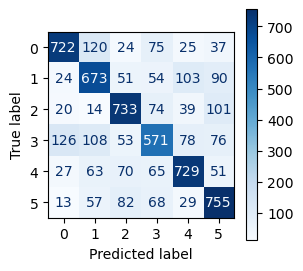

In [26]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

# Prediction with Decision Tree (using default parameters)

In [28]:
decTree = DecisionTreeClassifier()
_ = decTree.fit(X_train, np.ravel(y_train))

y_pred = decTree.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.7645    0.7378    0.7509      1003
advanced_data_science     0.7210    0.7296    0.7253       995
   advanced_front_end     0.7609    0.7849    0.7727       981
     beginner_backend     0.7166    0.6947    0.7055      1012
beginner_data_science     0.7475    0.7512    0.7494      1005
   beginner_front_end     0.7916    0.8058    0.7986      1004

             accuracy                         0.7505      6000
            macro avg     0.7503    0.7507    0.7504      6000
         weighted avg     0.7503    0.7505    0.7503      6000



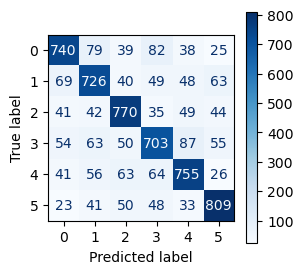

In [29]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


In [30]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Decision Tree', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

# Ensemble Techniques
## Prediction with Random Forest (using default parameters)

In [31]:
randForest = RandomForestClassifier()
_ = randForest.fit(X_train, np.ravel(y_train))

y_pred = randForest.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.9406    0.9153    0.9277      1003
advanced_data_science     0.8805    0.8884    0.8844       995
   advanced_front_end     0.9106    0.9235    0.9170       981
     beginner_backend     0.9155    0.8775    0.8961      1012
beginner_data_science     0.9190    0.9373    0.9281      1005
   beginner_front_end     0.9126    0.9363    0.9243      1004

             accuracy                         0.9130      6000
            macro avg     0.9131    0.9130    0.9129      6000
         weighted avg     0.9132    0.9130    0.9129      6000



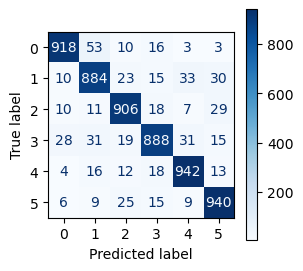

In [32]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [33]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Random Forest', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

## Prediction with ADABoost (using default parameters)

In [34]:
adaBoost = AdaBoostClassifier()
_ = adaBoost.fit(X_train, np.ravel(y_train))

y_pred = adaBoost.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.5659    0.6461    0.6034      1003
advanced_data_science     0.5432    0.4553    0.4954       995
   advanced_front_end     0.6701    0.6024    0.6345       981
     beginner_backend     0.4779    0.4694    0.4736      1012
beginner_data_science     0.6402    0.6657    0.6527      1005
   beginner_front_end     0.6227    0.6823    0.6511      1004

             accuracy                         0.5868      6000
            macro avg     0.5867    0.5868    0.5851      6000
         weighted avg     0.5863    0.5868    0.5849      6000



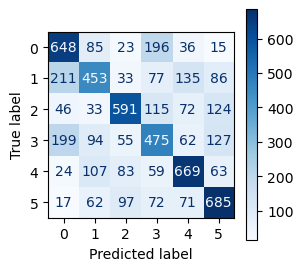

In [35]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [36]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'ADA Boost', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

## Prediction with Gradient Boost (using default parameters)

In [37]:
gradBoost = GradientBoostingClassifier()
_ = gradBoost.fit(X_train, np.ravel(y_train))

y_pred = gradBoost.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.9032    0.8554    0.8786      1003
advanced_data_science     0.8293    0.8593    0.8440       995
   advanced_front_end     0.8755    0.8746    0.8751       981
     beginner_backend     0.8586    0.8281    0.8431      1012
beginner_data_science     0.8793    0.8915    0.8854      1005
   beginner_front_end     0.8784    0.9133    0.8955      1004

             accuracy                         0.8703      6000
            macro avg     0.8707    0.8704    0.8703      6000
         weighted avg     0.8707    0.8703    0.8703      6000



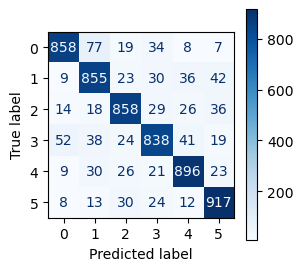

In [38]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [39]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Gradient Boost', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

## Prediction with XG Boost (using default parameters)

In [40]:
le = preprocessing.LabelEncoder()
y_train_xgb = le.fit_transform(np.ravel(y_train))
y_test_xgb = le.fit_transform(np.ravel(y_test))

xgBoost = XGBClassifier()
_ = xgBoost.fit(X_train, np.ravel(y_train_xgb))

y_pred = xgBoost.predict(X_test)
print(classification_report(y_test_xgb, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9540    0.9302    0.9419      1003
           1     0.9013    0.9176    0.9094       995
           2     0.9245    0.9358    0.9301       981
           3     0.9221    0.9002    0.9110      1012
           4     0.9358    0.9423    0.9390      1005
           5     0.9350    0.9462    0.9406      1004

    accuracy                         0.9287      6000
   macro avg     0.9288    0.9287    0.9287      6000
weighted avg     0.9288    0.9287    0.9287      6000



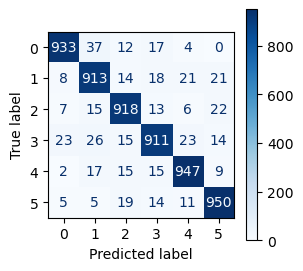

In [41]:
# display the confusion matrix
matrix = confusion_matrix(y_test_xgb, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [42]:
accuracy = accuracy_score(y_test_xgb, y_pred)
f1_micro = f1_score(y_test_xgb, y_pred, average='micro')
f1_macro = f1_score(y_test_xgb, y_pred, average='macro')
f1_weighted = f1_score(y_test_xgb, y_pred, average='weighted')
recall_micro = recall_score(y_test_xgb, y_pred, average='micro')
recall_macro = recall_score(y_test_xgb, y_pred, average='macro')
recall_weighted = recall_score(y_test_xgb, y_pred, average='weighted')
precision_micro = precision_score(y_test_xgb, y_pred, average='micro')
precision_macro = precision_score(y_test_xgb, y_pred, average='macro')
precision_weighted = precision_score(y_test_xgb, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'XG Boost', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

# Prediction with Neural Networks (using default parameters)

In [43]:
NNModel = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=500)
_ = NNModel.fit(X_train, np.ravel(y_train))

y_pred = NNModel.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                       precision    recall  f1-score   support

     advanced_backend     0.9652    0.9671    0.9661      1003
advanced_data_science     0.9401    0.9457    0.9429       995
   advanced_front_end     0.9591    0.9562    0.9576       981
     beginner_backend     0.9442    0.9368    0.9405      1012
beginner_data_science     0.9580    0.9522    0.9551      1005
   beginner_front_end     0.9546    0.9631    0.9588      1004

             accuracy                         0.9535      6000
            macro avg     0.9535    0.9535    0.9535      6000
         weighted avg     0.9535    0.9535    0.9535      6000



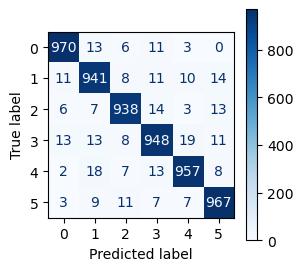

In [44]:
# display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks', "accuracy": [accuracy], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted], "recall_micro": [recall_micro], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_macro": [recall_macro], 
                                                    "recall_weighted": [recall_weighted]})])

In [46]:
performance

,model,accuracy,precision_micro,precision_macro,precision_weighted,recall_micro,recall_macro,recall_weighted,f1_micro,f1_macro,f1_weighted
0,Logestic Regression,0.697167,0.697167,0.697510,0.697382,0.697167,0.697502,0.697167,0.697167,0.696666,0.696430
0,Decision Tree,0.750500,0.750500,0.750335,0.750291,0.750500,0.750672,0.750500,0.750500,0.750389,0.750281
0,Random Forest,0.913000,0.913000,0.913119,0.913177,0.913000,0.913047,0.913000,0.913000,0.912936,0.912941
0,ADA Boost,0.586833,0.586833,0.586660,0.586273,0.586833,0.586849,0.586833,0.586833,0.585095,0.584900
0,Gradient Boost,0.870333,0.870333,0.870702,0.870726,0.870333,0.870383,0.870333,0.870333,0.870280,0.870266
0,XG Boost,0.928667,0.928667,0.928770,0.928815,0.928667,0.928713,0.928667,0.928667,0.928669,0.928669
0,Neural Networks,0.953500,0.953500,0.953518,0.953503,0.953500,0.953523,0.953500,0.953500,0.953511,0.953492


# Results Discussion

So far Neural networks gave best accuracy with around 95%, not only accuracy it gave best results in all score metrics. So I will try to improve accuracy of Neural Networks by using RandomSearchCV

# Prediction with Neural Networks (using RandomSearchCV)

%%time

imp_metric = "accuracy"
kfolds = 4

parameters = {
    'hidden_layer_sizes': [(16,), (32,), (64,), (16,8)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [5000]
}

nnRandomModel = MLPClassifier(random_state=1)
randomSearch = RandomizedSearchCV(
    estimator = nnRandomModel,     
    param_distributions=parameters,
    cv=kfolds,
    n_iter=100,
    scoring=imp_metric,
    verbose=0,
    n_jobs=-1,
    random_state=1
)

randomSearch.fit(X_train, np.ravel(y_train))

NNModel = randomSearch.best_estimator_

print(randomSearch.best_params_)

y_pred = NNModel.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

### Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig,ax = plt.subplots(figsize=(3, 3))
display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

accuracy = NNModel.score(X_test, y_test)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks Random Search', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], 
                                                    "f1_weighted": [f1_weighted], "recall_micro": [recall_micro], 
                                                    "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], 
                                                    "precision_weighted": [precision_weighted]})])
performance

## The random searchd with hyperparameter tuning did help to improve accuracy to around 96% but I would not recomend it unless you have an accelerator/faster GPU in kaggle because it took me around 1hr15min to run RandomSearchCV. So for now I am using Neural network with default parameters.

# Loading Unscored Data

In [47]:
studentsUnScoredData = pd.read_csv('/kaggle/input/tech-students-profile-prediction/to_be_scored_tortuga.csv')

In [48]:
studentsUnScoredData.head(3)

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,0,Melody Gentry,39064009,84,30,0,4,6,3,3,7,6,51,74,37
1,1,Lera Mitchel,26414743,42,74,13,3,6,4,2,7,5,82,59,50
2,2,Dianne Ransdell,40811094,18,76,38,5,2,8,8,3,8,77,53,50


In [49]:
# Looking for any null values

studentsUnScoredData.isna().sum()

Unnamed: 0                          0
NAME                                0
USER_ID                             0
HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
dtype: int64

# Preprocessing unscored data

In [50]:
unScoredData = studentsUnScoredData.drop(['Unnamed: 0', 'NAME', 'USER_ID'], axis=1)
predictorsUnScored = list(unScoredData.columns)
unScoredData[predictorsUnScored] = scaler.fit_transform(unScoredData[predictorsUnScored])

In [51]:
profilePredictors = unScoredData[predictorsUnScored]

# Generating our predicted profiles and adding them to unscored dataset

In [52]:
predictedProfile = NNModel.predict(profilePredictors)

In [53]:
studentsUnScoredData['PROFILE'] = predictedProfile

In [54]:
studentsUnScoredData.head(5)

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,0,Melody Gentry,39064009,84,30,0,4,6,3,3,7,6,51,74,37,advanced_backend
1,1,Lera Mitchel,26414743,42,74,13,3,6,4,2,7,5,82,59,50,beginner_front_end
2,2,Dianne Ransdell,40811094,18,76,38,5,2,8,8,3,8,77,53,50,advanced_backend
3,3,Michael Sellers,46199789,77,29,23,7,2,6,1,6,1,68,57,60,advanced_data_science
4,4,Evelyn Hilliard,95025845,35,14,39,0,5,3,2,8,3,63,82,91,beginner_data_science


# Saving our new dataset into CSV files.

In [55]:
studentsUnScoredData.to_csv('scored_tortuga.csv', index=False)